<a href="https://colab.research.google.com/github/dduniverse/ML-study/blob/main/06_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN(K Nearest Neighbors), K-최근접 이웃 모델
- **종속변수가 범주형**이며, 개수가 3개 이상인 **다중분류(Multiclassification)**을 다룸
- **거리 기반 모델**로, 각 데이터 간의 거리를 활용해서 새로운 데이터를 예측
- 다중분류 모델에서 가장 간편히 적용할 수 있는 알고리즘으로 baseline으로 사용

|장점|단점|
|---|---|
|수식에 대한 설명이 필요없을 만큼 직관적이고 간단함|데이터가 커질수록 상당히 느려질 수 있음|
|선형 모델과 다르게 별도의 가정이 없음|아웃라이어에 취약함|

- 주로 분류에 사용되며, 로지스틱 회귀로 해결할 수 없는 3개 이상의 목표 변수들도 분류할 수 있음
- 작은 데이터셋에 적합

## 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/wine.csv'
data = pd.read_csv(file_url)

## 데이터 확인하기

In [3]:
# 상위 5행
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [4]:
# 컬럼 정보
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

In [5]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,176.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.989091,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.362370,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.804431,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.126153,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.355000,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.260000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.672500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.450000,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.750000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


1. 결측치가 존재함

2. 변수마다 값의 범위가 상당히 다름
- 거리 기반 알고리즘인 KNN에서는 변수의 스케일이 문제가 될 수 있으므로 스케일링을 진행해야 함

3. 75%와 max값의 차이가 유독 두드러지는 변수 존재 = 아웃라이어
- 아웃라이어는 경우에 따라 모델링에 영향을 미칠 수 있음

## 목표값에서 고유값 확인하기
목표값의 특성에 따라(연속형 변수, 이진변수, 3개 이상의 범주형 변수) 적합한 알고리즘이 다르기 때문에 필요에 따라 확인해야 함
- `unique()`
- `nunique()`
- `value_counts()`

In [6]:
data['class'].unique()

array([0, 1, 2])

In [7]:
data['class'].nunique()

3

In [8]:
data['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

In [9]:
data['class'].value_counts().index

Int64Index([1, 0, 2], dtype='int64')

<Axes: ylabel='class'>

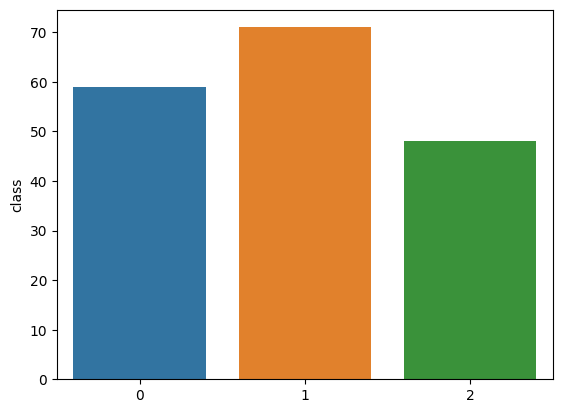

In [10]:
sns.barplot(x=data['class'].value_counts().index, y=data['class'].value_counts())

## 전처리: 결측치 처리하기

### 1. 결측치를 쉽게 확인하는 방법
- `isna()`
- `isnull()`

In [11]:
data.isnull() # 결측치 여부에 따라 T/F 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.sum()

alcohol                           2286.080000
malic_acid                         415.870000
ash                                421.240000
alcalinity_of_ash                 3470.100000
magnesium                        17754.000000
total_phenols                      408.530000
flavanoids                         361.210000
nonflavanoid_phenols                62.690000
proanthocyanins                    283.180000
color_intensity                    900.339999
hue                                170.426000
od280/od315_of_diluted_wines       464.880000
proline                         132947.000000
class                              167.000000
dtype: float64

In [13]:
data.isnull().sum() # T/F 변환 후 합 출력(True=1, False=0)

alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

- alcohol 컬럼에 결측치가 2개
- nonflavanoid_phenols 컬럼에 결측치가 5개 존재함

In [14]:
data.mean()

alcohol                          12.989091
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.362370
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
class                             0.938202
dtype: float64

In [15]:
data.isnull().mean() # T/F 변환 후 평균 출력(True=1, False=0)

alcohol                         0.011236
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.028090
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
class                           0.000000
dtype: float64

- alcohol에 약 1.12%의 결측치가 존재
- nonflavanoid_phenols에 약 2.81%의 결측치가 존재함

### 2. 결측치를 처리하는 방법

#### 결측치 행 제거하기: `dropna()`

In [16]:
data.dropna() # 결측치가 있는 행 제거

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [17]:
data.dropna().isnull().mean()

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
class                           0.0
dtype: float64

dropna()의 매개변수 subset을 통해 특정 컬럼을 지정할 수 있음 

In [18]:
data.dropna(subset=['alcohol']) # 지정된 변수(alcohol)의 결측치 행만 제거하기

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [19]:
data.dropna(subset=['alcohol']).isna().mean()

alcohol                         0.000000
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.028409
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
class                           0.000000
dtype: float64

#### 결측 변수 제거하기: `drop()`

In [20]:
data.drop(['alcohol', 'nonflavanoid_phenols'], axis=1) # 변수를 제거

,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.71,2.43,15.6,127,2.80,3.06,2.29,5.64,1.04,3.92,1065,0
1,1.78,2.14,11.2,100,2.65,2.76,1.28,4.38,1.05,3.40,1050,0
2,2.36,2.67,18.6,101,2.80,3.24,2.81,5.68,1.03,3.17,1185,0
3,1.95,2.50,16.8,113,3.85,3.49,2.18,7.80,0.86,3.45,1480,0
4,2.59,2.87,21.0,118,2.80,2.69,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...
173,5.65,2.45,20.5,95,1.68,0.61,1.06,7.70,0.64,1.74,740,2
174,3.91,2.48,23.0,102,1.80,0.75,1.41,7.30,0.70,1.56,750,2
175,4.28,2.26,20.0,120,1.59,0.69,1.35,10.20,0.59,1.56,835,2
176,2.59,2.37,20.0,120,1.65,0.68,1.46,9.30,0.60,1.62,840,2


#### 결측값 채우기: fillna()

In [21]:
data.fillna(-99) # 결측치를 -99로 치환

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,-99.00,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [22]:
data.fillna(data.mean()) # 평균값으로 결측치 채우기

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.230000,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,12.989091,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.160000,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.370000,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.240000,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.400000,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.270000,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.170000,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


### 3. 결측치 처리 방식 선택하기

1) `dropna()`를 사용한 결측치 행 제거 방법은 경우에 따라서 너무 과도하게 많은 데이터가 삭제될 수 있음
- 특정 변수의 90%가 결측치이면 90%의 데이터가 삭제됨
- 행을 지우는 방식을 택하려면 결측치 비중이 매우 낮아야하고, 데이터 크기도 충분히 커야 함

2) `drop()`을 사용한 변수 제거 방식은 매우 무모함
- 머신러닝에서는 변수 하나하나가 중요하기 때문에 변수 자체를 없애버리는 방식은 모델링에 도움이 되지 않은 경우가 많음
- 통상적으로 해당 변수의 결측치가 50%이상이면 drop()을 고려해볼만 하고, 70~80% 이상이면 가급적 drop()을 적용하는 것이 좋음
- 하지만 경우에 따라서는 90%가 결측치라고 해도, 해당 변수가 프로젝트에서 매우 중요한 역할을 할 거라 예상된다면 어떻게든 활용 방법을 찾는 것이 좋음 

3) `fillna()`를 사용하여 평균값 등으로 결측치를 채워주는 방식은 무난함
- 어떤 값이더라도 결국은 추정치이기 때문에 노이즈를 완전히 피할 수 없음
- 결측치를 채우려는 노력과 시간에 비해서 평균으로 처리하는 것보다 월등히 나은 결과를 보여주지 않는 결과가 많음

### 4. 결측치 처리하기
`fillna()`를 사용하여 결측치를 채우되, 아웃라이어에 조금 덜 민감한 중윗값(median)을 사용

In [23]:
data.fillna(data.median(), inplace=True) # 결측치를 중윗값으로 채우기

In [24]:
data.isna().mean() # 결측치 확인

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
class                           0.0
dtype: float64

## 스케일링

스케일링: 데이터의 스케일(scale)을 맞추는 작업
- **표준화 스케일링**(Standard Scaling): 평균이 0이 되고, 표준편차가 1이 되도록 데이터를 고르게 분포시키는데 사용
- **로버스트 스케일링**(Robust Scaling): 데이터에 아웃라이어가 존재하고, 그 영향력을 그대로 유지하고 싶을 때 사용
- **최소-최대 스케일링**(Min-Max Scaling): 데이터 분포의 특성을 최대한 그대로 유지하고 싶을 때 사용
- **정규화 스케일링**(Normalizer Scaling): 행 기준의 스케일링이 필요할 때 사용하나, 실제로 거의 사용하지 않음

#### 표준화 스케일링(Standard Scaling)

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [26]:
st_scaler = StandardScaler() # 스케일러 지정
st_scaler.fit(data) # 학습
st_scaled = st_scaler.transform(data) # 학습에서 얻은 정보 계산

In [27]:
st_scaled

array([[ 1.55484903, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.07550273, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.21340789,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.35131305,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.22594472,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.4294807 ,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

In [28]:
pd.DataFrame(st_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.902934,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.275618,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.514292,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.550187,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.351313,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.550187,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.225945,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.356221,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


In [29]:
st_scaled = pd.DataFrame(st_scaled, columns=data.columns)
st_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.902934,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.275618,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.514292,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.550187,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.351313,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.550187,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.225945,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.356221,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


In [30]:
round(st_scaled.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.46,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49,-1.21
25%,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78,-1.21
50%,0.08,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23,0.08
75%,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76,1.37
max,2.21,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97,1.37


표준화 스케일링은 데이터를 표준화된 정규분포로 만들어주는 방법임
- $x_i$: 변수의 i번째 값
- $mean(x)$: 해당 변수의 평균
- $sd(x)$: 해당 변수의 표준편차

$$\frac{x_i - mean(x)}{sd(x)}$$


모든 컬럼에서 평균과 표준편차가 각각 0과 1임을 볼 수 있음
- min과 max는 컬럼마다 다르지만, 처음보다는 훨씬 차이가 줄었음
- 데이터가 더 동등한 수준에서 연산될 수 있음

#### 로버스트 스케일링(Robust Scaling)

In [31]:
rb_scaler = RobustScaler() 
rb_scaled = rb_scaler.fit_transform(data) # 로버스트 스케일링
rb_scaled = pd.DataFrame(rb_scaled, columns=data.columns)

In [32]:
round(rb_scaled.describe(), 2) 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.05,0.32,0.02,-0.00,0.09,-0.06,-0.06,0.13,0.05,0.12,-0.02,-0.14,0.15,-0.03
std,0.62,0.75,0.79,0.78,0.75,0.59,0.60,0.74,0.82,0.78,0.68,0.58,0.65,0.39
min,-1.55,-0.76,-2.88,-2.07,-1.47,-1.30,-1.07,-1.25,-1.64,-1.14,-1.44,-1.23,-0.82,-0.50
25%,-0.53,-0.18,-0.43,-0.53,-0.53,-0.58,-0.56,-0.42,-0.44,-0.49,-0.54,-0.68,-0.36,-0.50
50%,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
75%,0.47,0.82,0.57,0.47,0.47,0.42,0.44,0.58,0.56,0.51,0.46,0.32,0.64,0.50
max,1.31,2.66,2.50,2.44,3.37,1.44,1.76,1.91,2.89,2.79,2.21,0.99,2.08,0.50


로버스트 스케일링은 평균과 표준편차 대신 사분위값을 이용하여 계산됨
- $x_i$: 변수의 i번째 값
- $Q_1(x)$: 25% 지점
- $Q_2(x)$: 50% 지점(중윗값)
- $Q_3(x)$: 75% 지점

$$\frac{x_i - Q_2(x)}{Q_3(x)-Q_1(x)}$$


평균값이 0에 가깝지만 완전 0은 아니고, 분산 또한 표준화 스케일링과는 다르게 1로 고정되지 않음

#### 최소-최대 스케일링

In [33]:
mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(data)
mm_scaled = pd.DataFrame(mm_scaled, columns=data.columns)
round(mm_scaled.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,0.53,0.32,0.54,0.46,0.32,0.45,0.36,0.44,0.37,0.32,0.39,0.49,0.33,0.47
std,0.22,0.22,0.15,0.17,0.16,0.22,0.21,0.23,0.18,0.20,0.19,0.26,0.22,0.39
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.36,0.17,0.45,0.34,0.20,0.26,0.18,0.26,0.26,0.17,0.25,0.24,0.16,0.00
50%,0.54,0.22,0.53,0.46,0.30,0.47,0.38,0.40,0.36,0.29,0.39,0.55,0.28,0.50
75%,0.71,0.46,0.64,0.56,0.40,0.63,0.53,0.58,0.49,0.42,0.52,0.70,0.50,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


최소-최대 스케일링은 모든 컬럼에서 최댓값이 1, 최솟값이 0인 형태로 변환됨
- $x_i$: 변수의 i번째 값
- $min(x)$: 변수의 최솟값
- $max(x)$: 변수의 최댓값

$$\frac{x_i - min(x)}{max(x)-min(x)}$$


각 값에서 최솟값을 빼주고, 최댓값과 최솟값의 차이만큼으로 나누어주면 최소-최대 스케일링 결괏값이 도출됨

#### 스케일링 방식 선택하기
1. 아웃라이어의 유무 판단
- 아웃라이어의 영향이 큰 데이터이고 이를 피하고 싶으면 로버스트 스케일링이 적합
- 표준화 스케일링과 최소-최대 스케일링은 아웃라이어가 있을 때 민감하게 반응함
- 로버스트 스케일링은 사분위값을 사용하기 때문에 아웃라이어가 있어도 영향을 덜 받음

2. 데이터의 기존 분포 유지 여부
- 표준화 스케일링은 모든 데이터를 표준정규분포형태, 즉 좌우 대칭의 종 모양으로 변경하기 때문에, 여기에 제공하면 아웃라이어의 영향을 덜 받지만 기존의 데이터 분포에 대한 특징을 상실하게 됨
- 최소-최대 스케일링은 최댓값 1과 최솟값 0의 범위에서 기존 데이터의 분포를 최대한 그대로 옮겨담아 냄

|구분|결과물의 특징|
|---|---|
|표준화 스케일링|데이터에 아웃라이어가 존재할 때, 아웃라이어의 영향을 받음. 평균0, 분산1이 되게끔 분포시키기 때문에, 데이터의 기존 분포 형태가 사라지고 정규분포를 따르는 결과물을 가져옴|
|로버스트 스케일링|데이터에 아웃라이어가 존재할 때, 아웃라이어의 영향을 받지 않음. 변환된 데이터의 범위는 표준화 스케일링이나 최소-최대 스케일링보다 넓게 나타남|
|최소-최대 스케일링|표준화 스케일링과 마찬가지로 아웃라이어의 영향을 받게 됨. 위의 두 스케일러와 비교했을 때, 데이터의 기존 분포를 가장 있는 그대로 담아내며 스케일만 변화시킴. 데이터의 범위는 0~1로 나타남|

머신러닝에 스케일링을 적용할 때 주의하여야 할 점
1. 스케일링 대상에서 종속 변수 제외
- 결과물에서 class는 0,1,2 값으로 예측해야하기 때문에 이 변수는 그대로 남겨두어야 함
2. 스케일링 전에 훈련셋과 시험셋을 나누어야 함
- 훈련셋에서 fit()으로 스케일링을 위한 값을 학습시키고, 이 값을 활용하여 훈련셋과 시험셋을 변환해야 함

#### 스케일링 적용하기

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size=0.2, random_state=100) # 학습 데이터와 테스트 데이터 분리

In [35]:
mm_scaler = MinMaxScaler() # 최대-최소 스케일러
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

## 모델링 및 예측/평가하기

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() # KNN 모델
knn.fit(X_train_scaled, y_train) # 학습
pred = knn.predict(X_test_scaled) # 예측

In [37]:
pred

array([1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2])

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8888888888888888

## 하이퍼파라미터 튜닝
|함수명|설명|
|---|---|
|KNeighborsClassifier()|KNN은 분류와 회귀 문제 모두 지원. 
| |KNeighborsClassifier는 분류 문제를 위한 알고리즘이며, 회귀 문제에는 KNEighborsRegressor를 사용|
| |주요 파라미터|
| |- n_neighbors=5: 예측에 참고할 이웃 수(기본값 5)|
| |- weights='uniform': 예측에 사용되는 가중치 함수로 기본값인 uniform은 모든 포인트에 동일한 가중치 부여(uniform, distance, 사용자 정의 함수)|
| |- metric='minkowski': 거리 측정 기준|
| |- n_jobs=None: 실행할 병렬 작업 수|


In [39]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9166666666666666

In [40]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.8888888888888888

- n_neighbors를 7로 설정했을 때 약 92%로 예측 정확도가 상승함
- n_neighbors를 7로 설정했을 때는 기본값 5일때와 같은 결과임

In [41]:
# n_neighbors에 1부터 20까지 숫자를 넣어 정확도 확인
for i in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled, y_train)
  pred = knn.predict(X_test_scaled)
  print(accuracy_score(y_test, pred))

0.9166666666666666
0.8888888888888888
0.8888888888888888
0.9166666666666666
0.8888888888888888
0.9166666666666666
0.9166666666666666
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.9166666666666666
0.9166666666666666
0.9722222222222222
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9166666666666666
0.9722222222222222
0.9444444444444444
0.9722222222222222


In [42]:
scores = [] # 정확도를 저장할 리스트
for i in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled, y_train)
  pred = knn.predict(X_test_scaled)
  acc = accuracy_score(y_test, pred)
  scores.append(acc) # 정확도 저장

<Axes: >

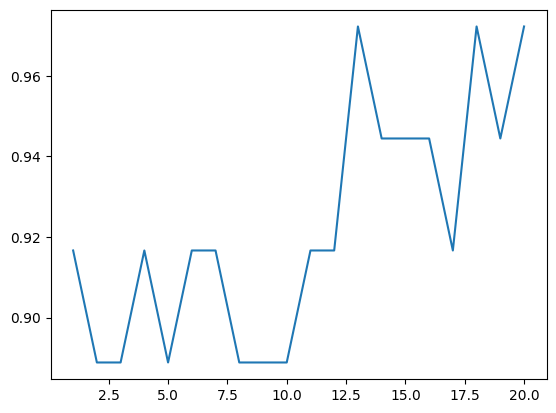

In [43]:
sns.lineplot(x=range(1, 21), y=scores) # 그래프 생성 및 출력

대체로 매개변수 값이 클수록 더 나은 예측을 보여주지만, 13 이후로는 딱히 더 나은 개선은 보이지 않음
- 결과가 같다면 더 큰 값을 매개변수로 사용할 필요 없음
- 13이 합리적인 선택

In [44]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9722222222222222